In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#to import first execute this command in the bash
# cp drive/MyDrive/fabric_classification/Fabric_Classification/my_utils.py .
import my_utils

In [ ]:
#based of https://www.tensorflow.org/tutorials/load_data/images
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import re
import pathlib
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint

path = "/content/drive/MyDrive/fabric_classification/Fabrics_adjusted"

data_dir = pathlib.Path(path)

In [ ]:
batch_size = 32
img_height = 400
img_width = 400

train_ds, val_ds, class_names = my_utils.generate_ds(data_dir, batch_size, img_height, img_width)

print(class_names)

Found 4692 files belonging to 6 classes.
Using 3754 files for training.
Found 4692 files belonging to 6 classes.
Using 938 files for validation.
['Cotton', 'Denim', 'Nylon', 'Polyester', 'Silk', 'Wool']


In [ ]:
#data augmentation based of https://keras.io/examples/vision/image_classification_from_scratch/

#the augmentations to make
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomRotation(0.5)
    ]
)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
#based of https://www.tensorflow.org/tutorials/load_data/images
num_classes = 6

norm = 0.0
dropout_val = 0.0

model = tf.keras.Sequential([
  data_augmentation,
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, input_shape=(32, 400, 400, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(norm)),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(norm)),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(norm)),
  tf.keras.layers.Dropout(dropout_val),
  
  tf.keras.layers.Dense(num_classes)
])

model.compile(
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005),#default learning rate 0.001
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

checkpoint = my_utils.generate_callback("/content/drive/MyDrive/fabric_classification/", "Model-3f-Aug-fa-lr=5e-4")

hist = model.fit(
    train_ds, 
    validation_data = val_ds, 
    epochs = 150, 
    verbose = 1, 
    callbacks = [checkpoint])

model.summary()

Epoch 1/150
118/118 [==============================] - ETA: 0s - loss: 1.2932 - accuracy: 0.5618
Epoch 1: val_accuracy improved from -inf to 0.59062, saving model to /content/drive/MyDrive/fabric_classification/Model-3f-fa-lr=5e-4.h5
118/118 [==============================] - 907s 7s/step - loss: 1.2932 - accuracy: 0.5618 - val_loss: 1.2224 - val_accuracy: 0.5906
Epoch 2/150
117/118 [============================>.] - ETA: 0s - loss: 1.1016 - accuracy: 0.6127
Epoch 2: val_accuracy improved from 0.59062 to 0.62047, saving model to /content/drive/MyDrive/fabric_classification/Model-3f-fa-lr=5e-4.h5
118/118 [==============================] - 10s 84ms/step - loss: 1.1017 - accuracy: 0.6124 - val_loss: 1.0914 - val_accuracy: 0.6205
Epoch 3/150
117/118 [============================>.] - ETA: 0s - loss: 1.0295 - accuracy: 0.6394
Epoch 3: val_accuracy improved from 0.62047 to 0.63859, saving model to /content/drive/MyDrive/fabric_classification/Model-3f-fa-lr=5e-4.h5
118/118 [==================

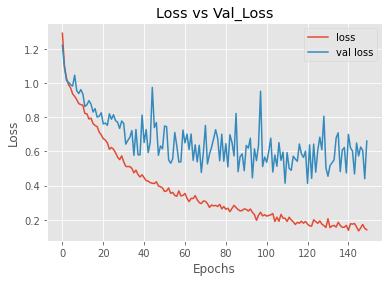

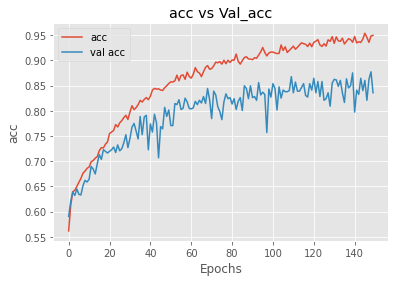

0

In [ ]:
my_utils.generate_plot(hist)

(938, 6)
[[370  15   1  35   2  22]
 [  7 118   0   2   0  11]
 [  1   0  33   2   2   2]
 [  4   0   2 170  16   2]
 [  2   0   0   8  30   0]
 [  3   0   0  15   0  63]]


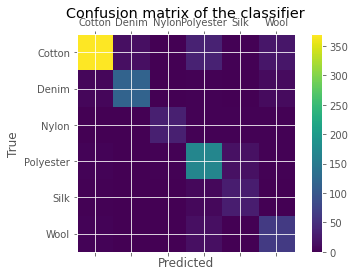

0

In [ ]:
my_utils.generate_cm(model, val_ds, class_names)